In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [3]:
# Define the time range for the stock data
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [4]:
# Download stock data
stock = "AAPL"
stock_data = yf.download(stock, start, end)


[*********************100%%**********************]  1 of 1 completed


In [5]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data[['Adj Close']])


In [6]:
# Prepare data for training
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i - 100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)


In [7]:
# Split the data into training and testing sets
splitting_len = int(len(x_data) * 0.7)
x_train, y_train = x_data[:splitting_len], y_data[:splitting_len]
x_test, y_test = x_data[splitting_len:], y_data[splitting_len:]


In [8]:
# Define the LSTM model using Input layer
model = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Specify the input shape
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model
history = model.fit(x_train, y_train, batch_size=25, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 3.0454e-06 - val_loss: 1.4967e-04
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 2.9785e-06 - val_loss: 1.9969e-04
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 4.4024e-06 - val_loss: 1.3129e-04
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.7297e-06 - val_loss: 1.5751e-04
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 3.4976e-06 - val_loss: 1.8148e-04
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 2.5857e-06 - val_loss: 1.5550e-04
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 3.7081e-06 - val_loss: 6.0706e-04
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 6.3104e-06 - val_loss: 2.0846e-04
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 3.2418e-06 - val_loss: 1.4982e-04
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 3.1033e-06 - val_loss: 3.1604e-04
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

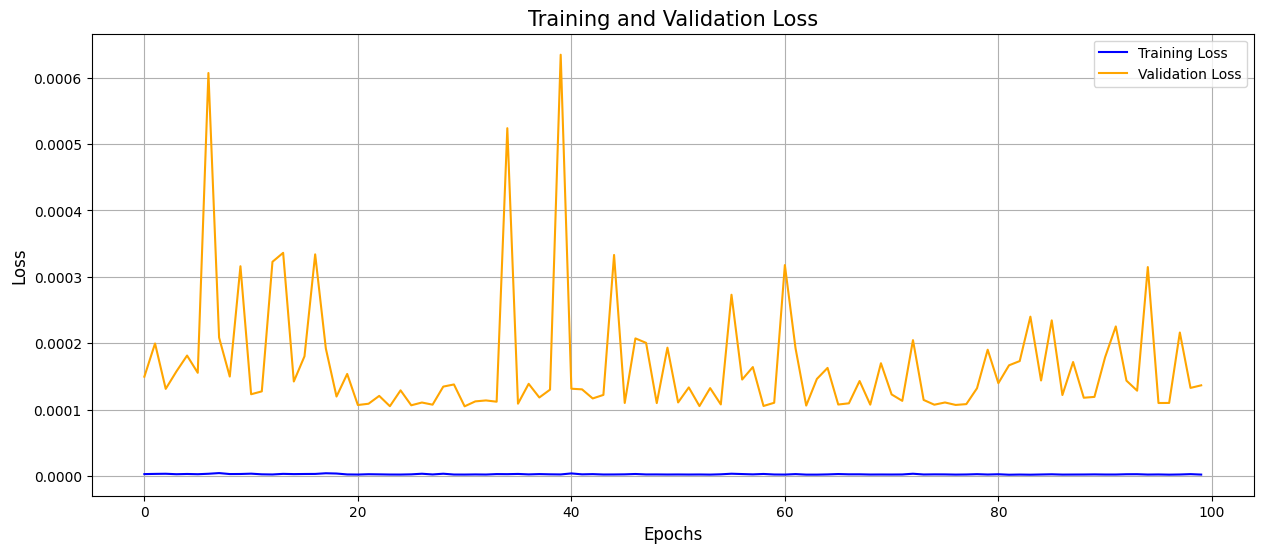

In [16]:
# Plot training and validation loss
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Make predictions
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [18]:
# Inverse transform the predictions and test values
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

In [19]:
# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 2.7395261917049236


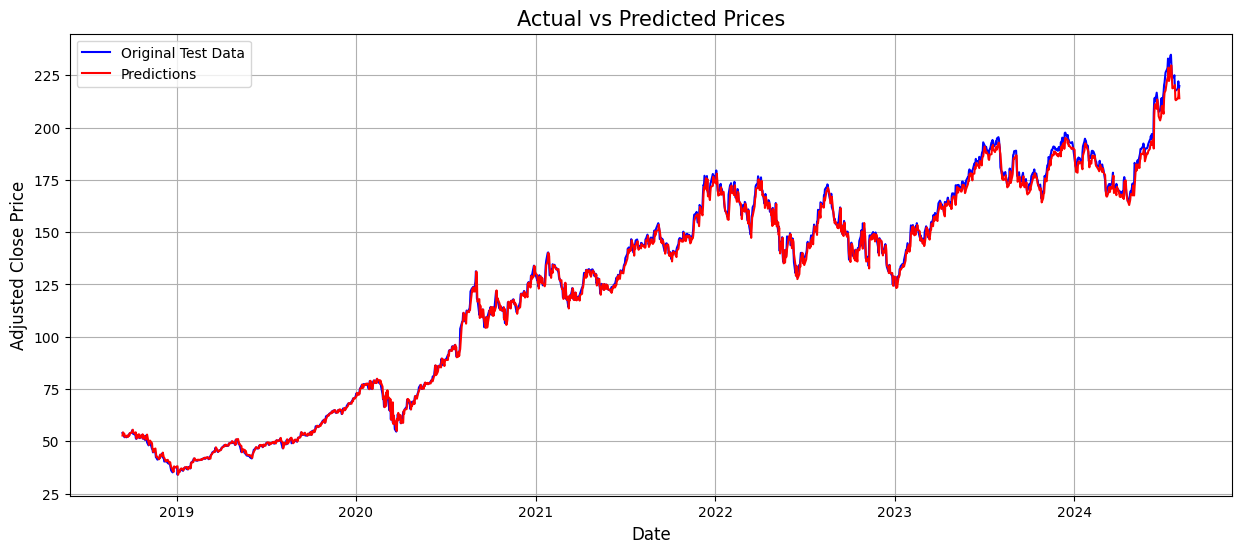

In [20]:
# Plot predictions vs actual values
ploting_data = pd.DataFrame({
    'Original Test Data': inv_y_test.reshape(-1),
    'Predictions': inv_predictions.reshape(-1)
}, index=stock_data.index[len(stock_data) - len(inv_y_test):])

plt.figure(figsize=(15, 6))
plt.plot(ploting_data['Original Test Data'], label='Original Test Data', color='blue')
plt.plot(ploting_data['Predictions'], label='Predictions', color='red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.title('Actual vs Predicted Prices', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Save the model
model.save("Latest_stock_price_model.keras")